In [5]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt
import glob

In [6]:
dir ='./Images'
print(os.listdir(dir))

['Img1.jpg', 'Img3.jpg', 'Img4.jpg', 'Img_1.png', 'Img_2.png', 'Img_3.png', 'Img_4.png']


#### threshold >= nw - p 
#### n= number of neuron inputs and w is initial weights associated with it and p is inhibiting weight

In [7]:
def nn(ip,y):
    w1=w2=b=1
    for i in range(len(ip)):
        w1=y[i]*ip[i][0] + w1
        w2=y[i]*ip[i][1] + w2
        b=b+y[i]
        print(f"W1 : {w1} W2 : {w2} b : {b}")
    return w1,w2,b

In [8]:
def pred(ip,y,w1,w2,b):
    ypr=[]
    for i in range(len(ip)):
        ans = w1*ip[i][0]+ w2*ip[i][1] + b
        ypr.append(ans)
    t=np.array(ypr)
    return ypr

## And Gate

In [9]:
ip = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('int8')
y = np.array([0,0,0,1])

In [10]:
w1,w2,b=nn(ip,y)

W1 : 1 W2 : 1 b : 1
W1 : 1 W2 : 1 b : 1
W1 : 1 W2 : 1 b : 1
W1 : 2 W2 : 2 b : 2


In [11]:
predicted,threshold=pred(ip,y,w1,w2,b)
print("Predicted : ",predicted,"Threshold : ",threshold)

Predicted :  [2, 4, 4, 6] Threshold :  6


## Or Gate


In [12]:
ip = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('int8')
y = np.array([0,1,1,1])
w1,w2,b=nn(ip,y)

W1 : 1 W2 : 1 b : 1
W1 : 1 W2 : 2 b : 2
W1 : 2 W2 : 2 b : 3
W1 : 3 W2 : 3 b : 4


In [13]:
predicted,threshold=pred(ip,y,w1,w2,b)
print("Predicted : ",predicted,"Threshold : ",threshold)

Predicted :  [4, 7, 7, 10] Threshold :  10


## Nand Gate


In [14]:
ip = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('int8')
y = np.array([1,1,1,0])
w1,w2,b=nn(ip,y)

W1 : 1 W2 : 1 b : 2
W1 : 1 W2 : 2 b : 3
W1 : 2 W2 : 2 b : 4
W1 : 2 W2 : 2 b : 4


In [15]:
predicted,threshold=pred(ip,y,w1,w2,b)
print("Predicted : ",predicted,"Threshold : ",threshold)

Predicted :  [4, 6, 6, 8] Threshold :  8


## Nor Gate


In [16]:
ip = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('int8')
y = np.array([1,0,0,0])
w1,w2,b=nn(ip,y)

W1 : 1 W2 : 1 b : 2
W1 : 1 W2 : 1 b : 2
W1 : 1 W2 : 1 b : 2
W1 : 1 W2 : 1 b : 2


In [17]:
predicted,threshold=pred(ip,y,w1,w2,b)
print("Predicted : ",predicted,"Threshold : ",threshold)

Predicted :  [2, 3, 3, 4] Threshold :  4


## Xor Gate


In [18]:
ip = np.array([[0,0],[0,1],[1,0],[1,1]]).astype('int8')
y = np.array([0,1,1,0])
w1,w2,b=nn(ip,y)

W1 : 1 W2 : 1 b : 1
W1 : 1 W2 : 2 b : 2
W1 : 2 W2 : 2 b : 3
W1 : 2 W2 : 2 b : 3


In [19]:
predicted,threshold=pred(ip,y,w1,w2,b)
print("Predicted : ",predicted,"Threshold : ",threshold)

Predicted :  [3, 5, 5, 7] Threshold :  7


## Ques

In [20]:
ip = np.array([[-1,-1],[-1,1],[1,-1],[1,1]]).astype('int8')
y = np.array([-1,-1,-1,1])

In [21]:
w1,w2,b=nn(ip,y)

W1 : 2 W2 : 2 b : 0
W1 : 3 W2 : 1 b : -1
W1 : 2 W2 : 2 b : -2
W1 : 3 W2 : 3 b : -1


In [22]:
predicted,threshold=pred(ip,y,w1,w2,b)


In [23]:
glob.glob(dir+r"/*.jpg")

['./Images\\Img1.jpg', './Images\\Img3.jpg', './Images\\Img4.jpg']

## Perceptron

In [24]:
class Perceptron:
    def __init__(self, size):   
        self.weights = np.random.rand(size)
        self.bias = np.random.rand(1)
    
    def decision_boundary(self, x):
        return -(self.weights[0] * x + self.bias) / self.weights[1]
    
    def predict(self, inputs):
        z = np.dot(inputs, self.weights) + self.bias
        return 1 if z >= 0 else 0
    
    def train(self, inputs, labels, lr=0.1, epochs=100):
        for _ in range(epochs):
            for i in range(len(inputs)):
                x = inputs[i]
                y_true = labels[i]
                y_pred = self.predict(x)
                
                update = lr * (y_true - y_pred)
                self.weights += update * x
                self.bias += update


In [25]:
inputs = np.array([[-1, -1], [-1, 1], [1, -1], [1, 1]])
labels = np.array([-1, -1, -1, 1])
perceptron = Perceptron(size=2)
perceptron.train(inputs, labels)
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
for data in test_data:
    prediction = perceptron.predict(data)
    print(f"Input: {data}, Output: {prediction}")


Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


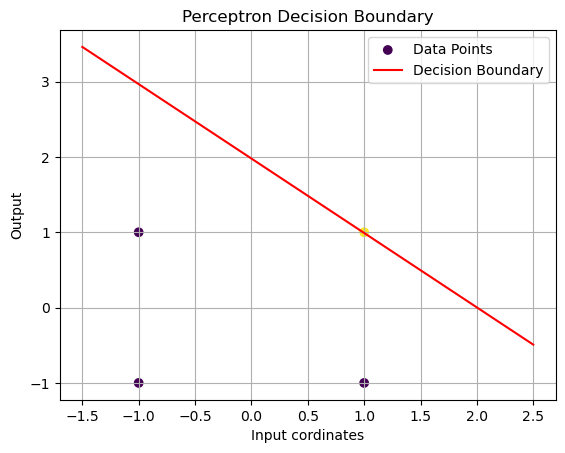

In [26]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=labels, cmap='viridis', label='Data Points')
plt.xlabel('Input cordinates')
plt.ylabel('Output')

x = np.linspace(-1.5, 2.5, 100)
y = perceptron.decision_boundary(x)
plt.plot(x, y, color='red', label='Decision Boundary')

plt.legend()
plt.title('Perceptron Decision Boundary')
plt.grid(True)
plt.show()


## Perceptron

In [9]:
class Perceptron:
    def __init__(self,weights,bias,thresh,size=None):
        self.thresh = thresh
        if weights is None:
            self.weights = np.random.rand(size)
            self.bias = np.random.rand(1)
        else:
            self.weights = weights
            self.bias = bias
    
    def train(self,ip,op,lr=0.1):
        for i in range(len(ip)):
            Yin = np.dot(ip[i],self.weights) + self.bias
#             print(Yin)
            k = lr *(op[i])
            if Yin > self.thresh:
                Y = 1
            elif Yin < self.thresh:
                Y = -1
            else:
                Y=0
#             print(k)
            if Y != op[i]:
                self.bias = self.bias + k
                for j in range(ip.shape[1]):
                    self.weights[j] = self.weights[j] + k*ip[i][j]
            print(self.weights,self.bias)
        return self.weights, self.bias

In [10]:
ip = np.array([[1,1],[1,-1],[-1,1],[-1,-1]])
op = np.array([1,-1,-1,-1])

In [11]:
a = Perceptron(np.array([0 ,0]), np.array(0),0)

In [12]:
a.train(ip,op,lr=1)

[1 1] 1
[0 2] 0
[1 1] -1
[1 1] -1


(array([1, 1]), -1)

In [13]:
a.train(ip,op,1)

[1 1] -1
[1 1] -1
[1 1] -1
[1 1] -1


(array([1, 1]), -1)